In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load the csv file
mushroom = pd.read_csv("mushrooms.csv")
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Data Checking and Cleaning

In [4]:
# The shape
mushroom.shape

(8124, 23)

In [5]:
# Missing values?
mushroom.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
mushroom.describe(include="all")

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## EDA

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

The proportion of edible and poisonous mushrooms.

In [10]:
edible = len(mushroom[mushroom["class"] == "e"])
poisonous = len(mushroom[mushroom["class"] == "p"])

print(f"There are {edible} edible mushrooms and {poisonous} poisonous mushrooms.")

There are 4208 edible mushrooms and 3916 poisonous mushrooms.


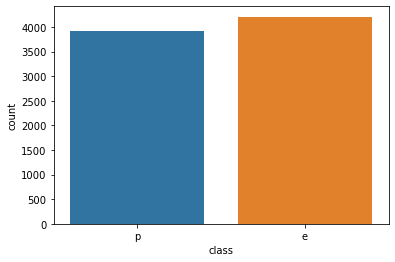

In [11]:
# Visualize this
sns.countplot(x="class", data=mushroom)
plt.show()

A countplot for each column showing the distribution between the different types.

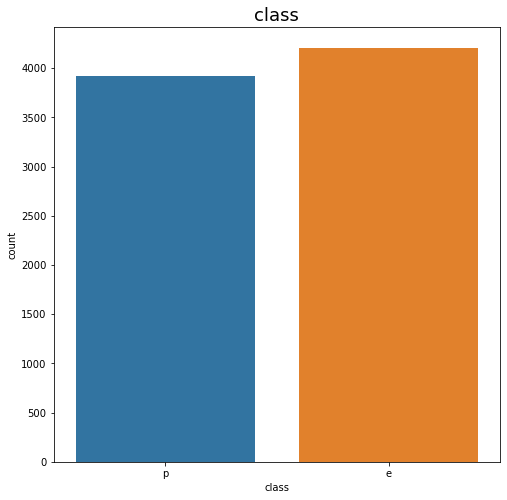

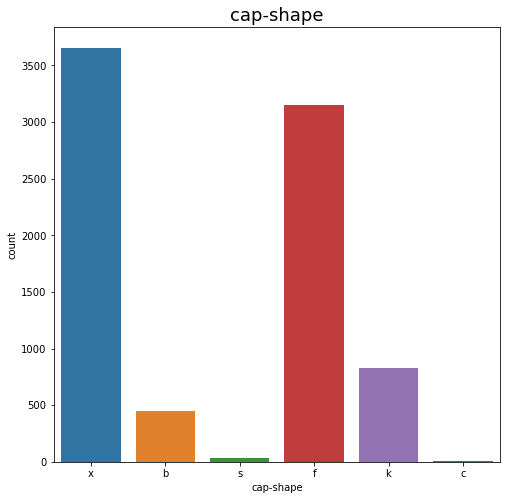

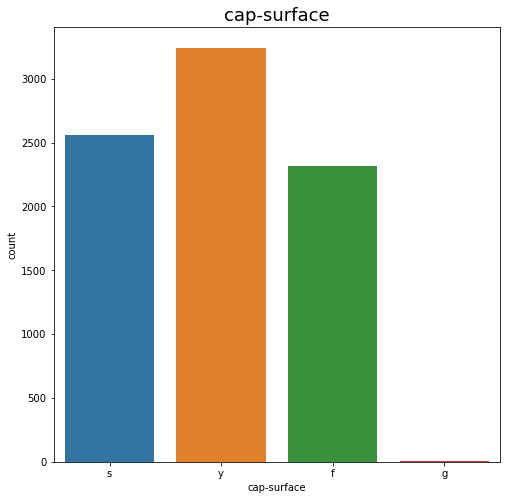

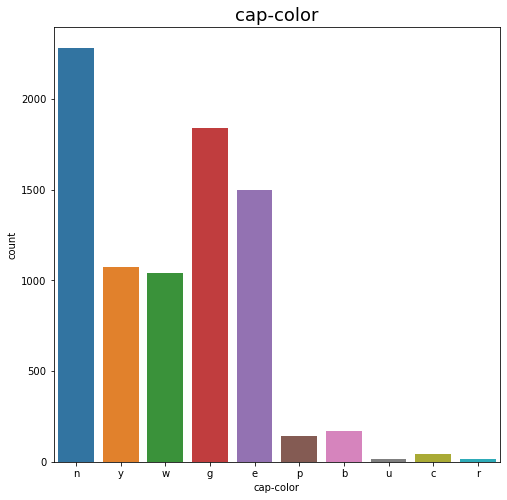

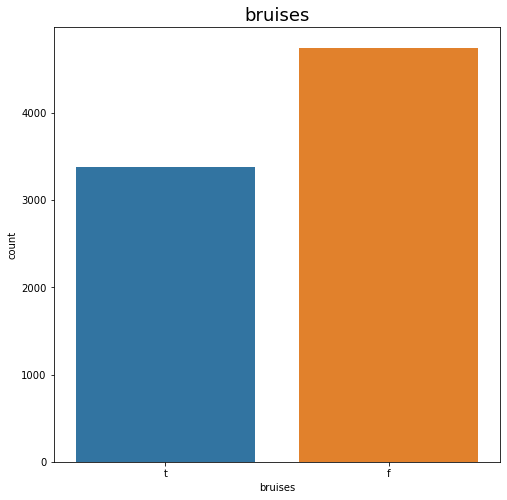

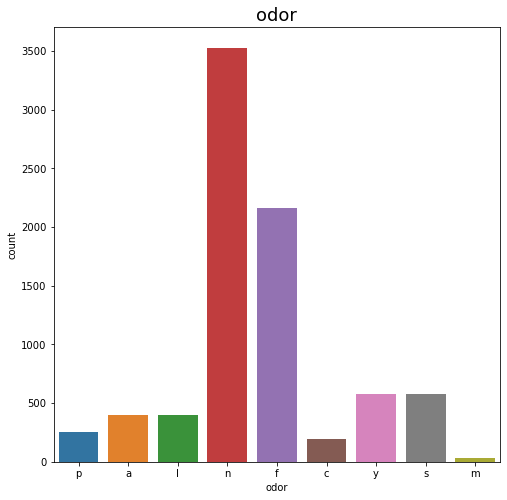

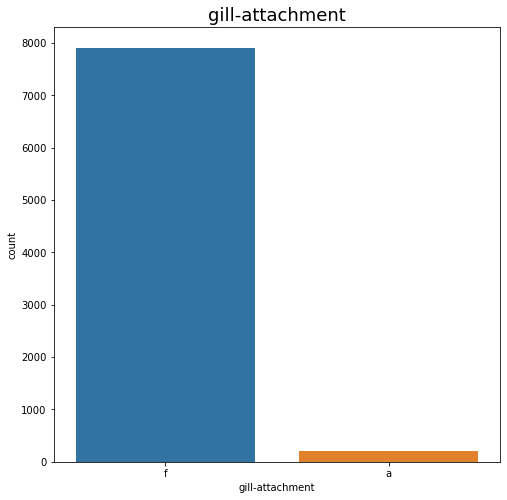

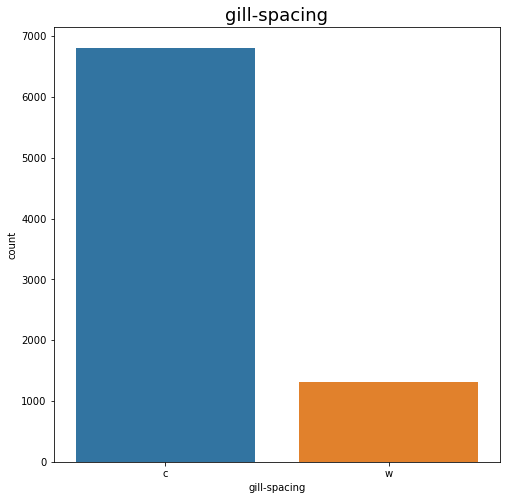

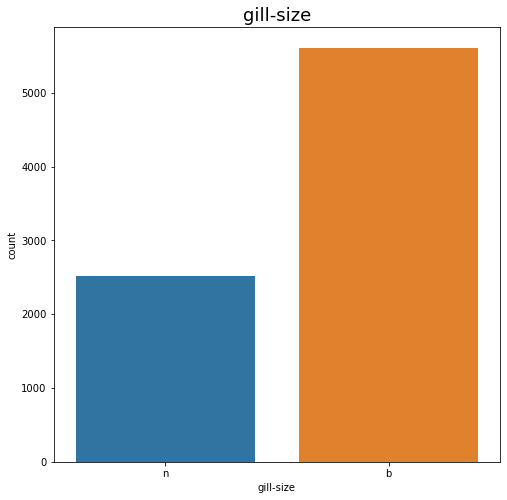

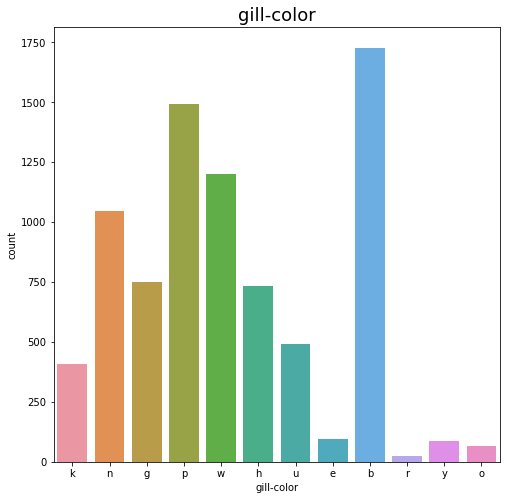

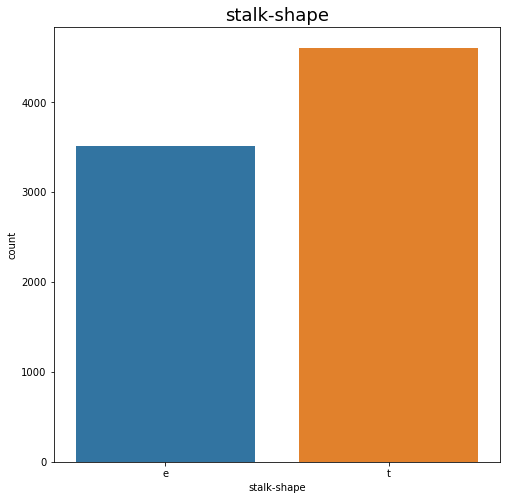

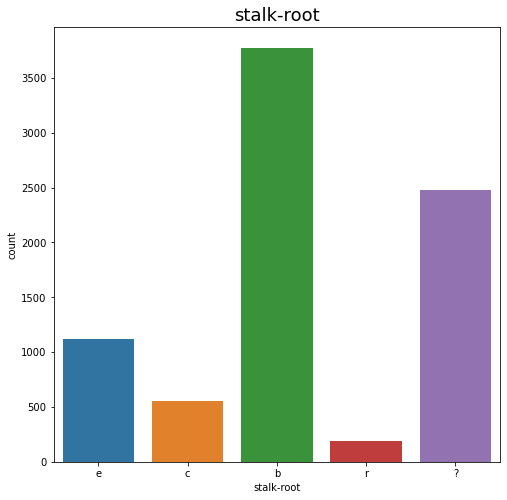

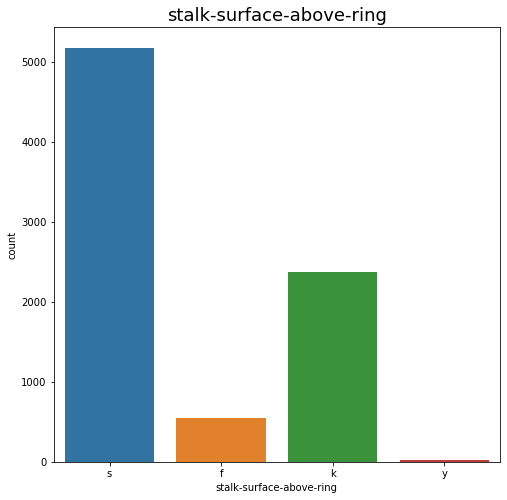

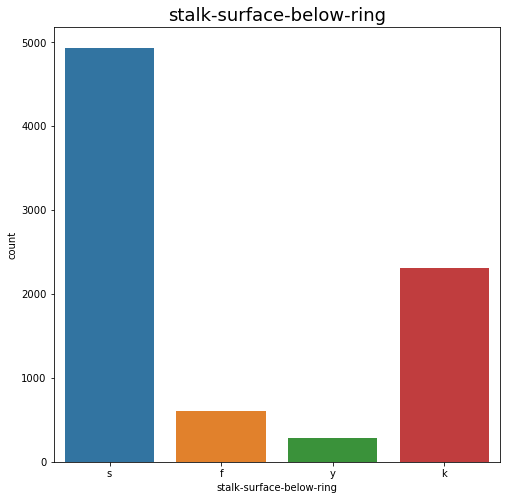

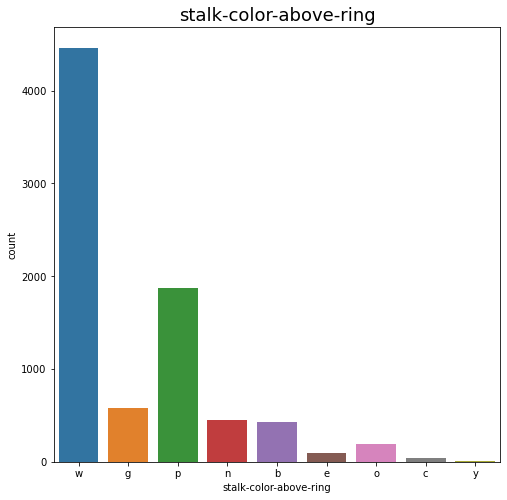

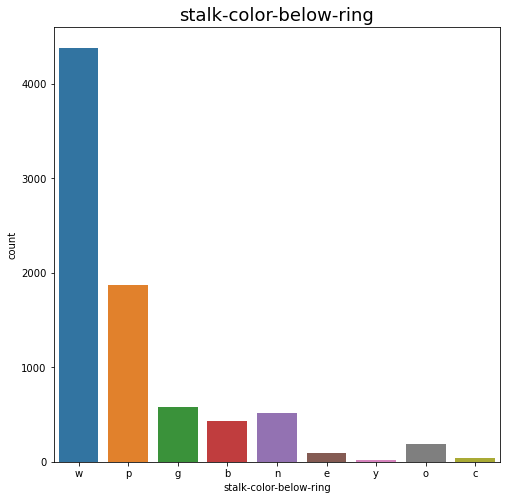

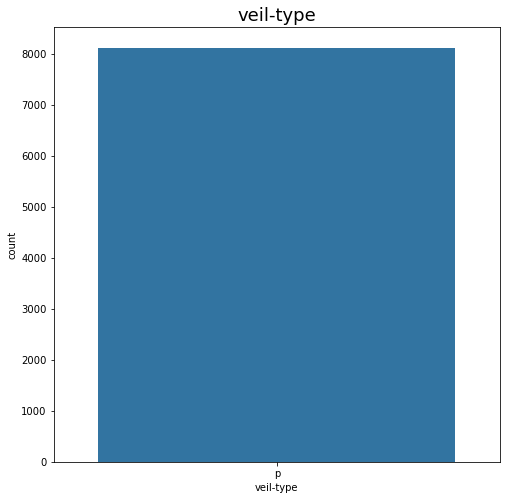

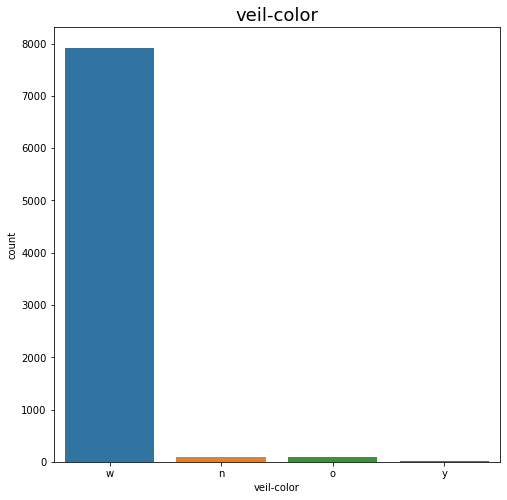

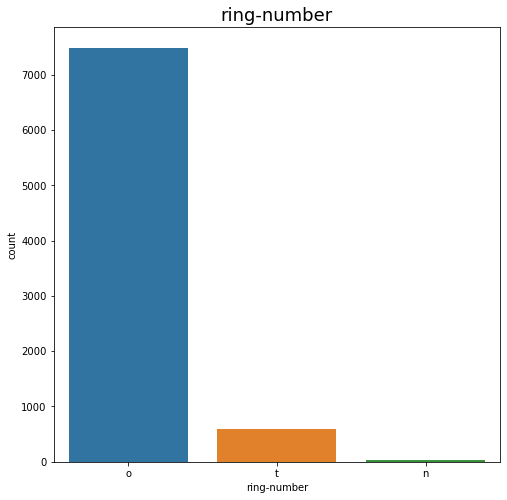

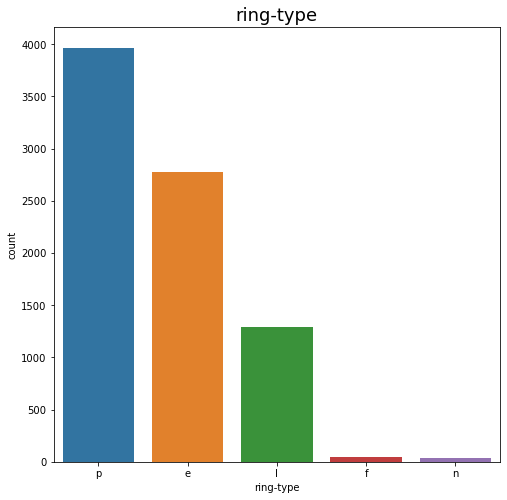

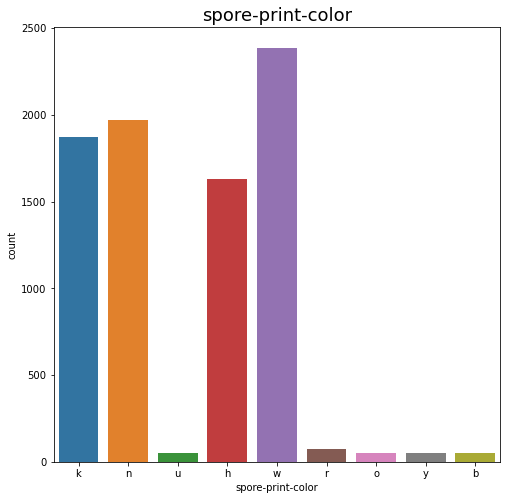

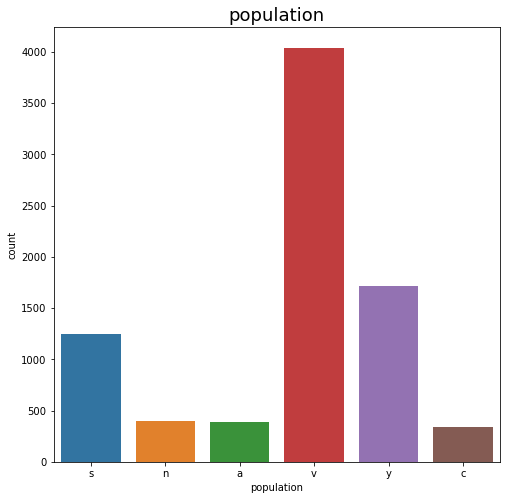

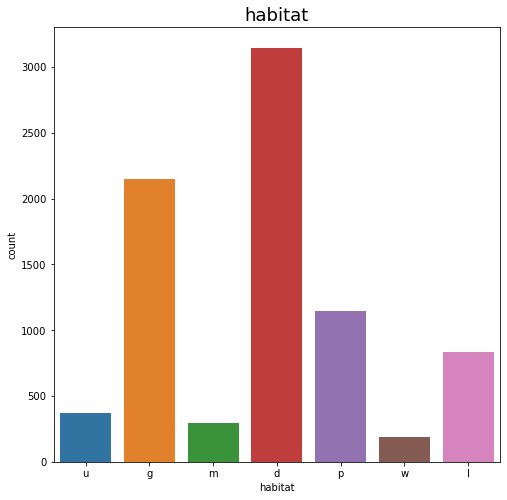

In [12]:
for column in mushroom.columns:
    plt.figure(figsize=(8,8))
    sns.countplot(x=column, data=mushroom)
    plt.title(column, fontsize=18)
    plt.show()

## Predictions

### 1. Predicting using `KNeighborsClassifier`

First, I'll do the preprocessing of data

1. Convert categorical data to numeric data
2. Replace values in `class` column:
   * `1` for `Poisonous`
   * `0` for `Edible`

In [14]:
# Coonvert the categorical data
not_change = ["class"]
change_cols = list(set(mushroom.columns) - set(not_change))

mushroom = pd.get_dummies(mushroom, columns=change_cols)

mushroom.head()

,class,veil-color_n,veil-color_o,veil-color_w,veil-color_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,...,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w
0,p,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
1,e,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
2,e,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
3,p,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
4,e,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1


In [16]:
# Replacing values in class column
mushroom["class"] = mushroom["class"].replace("p", 1)
mushroom["class"] = mushroom["class"].replace("e", 0)

mushroom.head()

,class,veil-color_n,veil-color_o,veil-color_w,veil-color_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,...,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w
0,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
2,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
3,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1


In [24]:
# Shuffle the data
mushroom = mushroom.sample(frac=1)
mushroom.head()

,class,veil-color_n,veil-color_o,veil-color_w,veil-color_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,...,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w
2960,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
5442,1,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2645,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
2436,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0
5400,1,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Set up random seed
np.random.seed(42)

# Create the data
X = mushroom.drop("class", axis=1)
y = mushroom["class"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model
clf = KNeighborsClassifier()

# Fit
clf.fit(X_train, y_train)

# Score
clf.score(X_test, y_test)

1.0

In [29]:
# Make predictions
y_pred = clf.predict(X_test)

print(f"Actual values: {np.array(y_test[:5])} Predicted values: {y_pred[:5]}" )

Actual values: [0 0 1 0 1] Predicted values: [0 0 1 0 1]


Confusion matrix and classification report

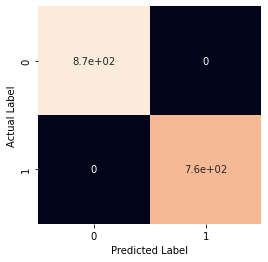

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

# Plotting the confusion_matrix
def plot_conf_mat(y_test, y_pred):
    conf_mat = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(conf_mat, annot=True, cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()
    
plot_conf_mat(y_test, y_pred)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       870
           1       1.00      1.00      1.00       755

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### 2. Predicting using `RandomForestClassifier`

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Set up random seed
np.random.seed(42)

# Create data
X = mushroom.drop("class", axis=1)
y = mushroom["class"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model
clf = RandomForestClassifier()

# Fit the model
clf.fit(X_train, y_train)

# Score
clf.score(X_test, y_test)

1.0

In [35]:
# Make predictions
y_pred = clf.predict(X_test)

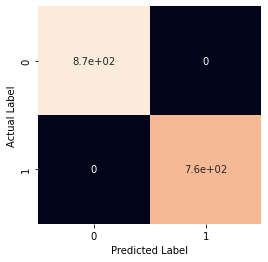

In [36]:
# Confusion matrix
plot_conf_mat(y_test, y_pred)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       870
           1       1.00      1.00      1.00       755

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Both `KNeighborsClassifier` and `RandomForestClassifier` models have a 100% accuracy.